In [1]:
import pyemu
import flopy as fp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import sys
sys.path.insert(1, '../modules')
# import modules
from Rouss import *
from Rouss3D import *

flopy is installed in C:\Users\emmal\Anaconda3\envs\LS\lib\site-packages\flopy


In [2]:
case = "3D_test"
m_d = "3D_pp2400_REGv2/master_glm_run"
pst_2 = pyemu.Pst(os.path.join(m_d,"{}.pst".format(case)))
pst_2.control_data.noptmax=0

In [3]:
post_pars = "3D_pp2400_REGv2/master_glm_run/3D_test.post.paren.csv"
df_new_pars = pd.read_csv(post_pars)

In [4]:
pst_2.parameter_data.parval1

parnme
kp_q_inst:0_i:28_j:124             1.0
kp_q_inst:0_i:28_j:132             1.0
kp_q_inst:0_i:36_j:116             1.0
kp_q_inst:0_i:36_j:124             1.0
kp_q_inst:0_i:36_j:132             1.0
                                  ... 
multiplier_irr_inst:0_zone:11.0    1.0
multiplier_irr_inst:0_zone:6.0     1.0
multiplier_const_ep_inst:0         1.0
multiplier_const_pms_inst:0        1.0
multiplier_const_qm_inst:0         1.0
Name: parval1, Length: 303, dtype: float64

In [5]:
df_new_pars

,real_name,kp_q_inst:0_i:28_j:124,kp_q_inst:0_i:28_j:132,kp_q_inst:0_i:36_j:116,kp_q_inst:0_i:36_j:124,kp_q_inst:0_i:36_j:132,kp_q_inst:0_i:44_j:100,kp_q_inst:0_i:44_j:108,kp_q_inst:0_i:44_j:116,kp_q_inst:0_i:44_j:124,...,multiplier_irr_inst:0_zone:8.0,multiplier_irr_inst:0_zone:13.0,multiplier_irr_inst:0_zone:14.0,multiplier_irr_inst:0_zone:9.0,multiplier_irr_inst:0_zone:5.0,multiplier_irr_inst:0_zone:11.0,multiplier_irr_inst:0_zone:6.0,multiplier_const_ep_inst:0,multiplier_const_pms_inst:0,multiplier_const_qm_inst:0
0,0,1.094520,2.241440,0.871658,1.147570,1.101660,1.299440,3.000000,0.677261,0.601758,...,1.71525,1.87349,2.00000,2.00000,0.800000,0.800000,1.99847,0.980259,0.191382,10.000000
1,1,0.463179,0.822007,2.443070,0.840826,0.320675,0.648574,3.000000,2.440220,1.623070,...,2.00000,2.00000,2.00000,1.62438,0.800000,0.820349,1.52664,1.314200,0.236579,0.240831
2,2,1.534150,1.737540,1.695170,2.166590,1.661050,0.588834,1.378860,1.585560,1.855490,...,2.00000,2.00000,1.73184,2.00000,0.800000,0.800000,1.95111,1.169330,0.196999,0.223414
3,3,2.941350,1.436710,0.304941,1.231550,2.298250,0.242522,0.503616,0.491094,1.494820,...,2.00000,1.86187,1.77945,2.00000,0.815075,0.800000,1.90821,1.089350,0.247598,1.535980
4,4,1.523790,1.490100,0.242714,0.408986,0.569791,0.599841,0.845149,0.194088,0.362187,...,1.87839,2.00000,1.76130,1.73407,0.800000,0.800000,2.00000,1.107930,0.219801,1.200210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,0.644954,1.408130,3.000000,1.845440,2.927600,0.526263,3.000000,3.000000,3.000000,...,2.00000,2.00000,1.84036,2.00000,0.827762,0.875949,2.00000,1.485470,0.171836,3.829060
146,146,0.951049,1.129370,1.624060,0.972807,0.458219,1.434400,1.799070,0.585685,0.526204,...,2.00000,1.84071,2.00000,1.74733,0.800000,0.800000,1.37894,1.124310,0.227531,0.095230
147,147,3.000000,0.494204,3.000000,3.000000,0.560027,0.473360,3.000000,3.000000,2.663800,...,1.90553,1.54452,1.80085,2.00000,0.800000,0.911311,2.00000,1.274050,0.181296,0.127255
148,148,3.000000,2.452310,3.000000,3.000000,1.368320,0.281906,0.993325,1.469660,2.670240,...,1.78179,2.00000,2.00000,1.86837,1.085470,0.800000,2.00000,1.413520,0.250335,0.758641


In [7]:
kQ = np.ones([150,182,183])
kPc = np.ones([150,182,183])
kep = np.ones([150,182,183])
kpms = np.ones([150,182,183])
kqm = np.ones([150,182,183])
irr = np.ones([150,182,183])
cond_riv = np.ones([150,6])

In [8]:
## create temporary folder from master glm run 
import shutil

org_dr = "3D_pp2400_REGv2/master_glm_run"
new_dr = "200modelsV2"
if new_dr not in os.listdir():
    shutil.copytree(org_dr,new_dr)

In [9]:
for i_model in range(150):
    
    pst_2.parameter_data.parval1 = df_new_pars.iloc[i_model,1:]
    pst_2.write(os.path.join(new_dr,"{}.pst".format(case)))
    pyemu.utils.run("..\pestpp-glm.exe {}".format(case),cwd=new_dr)
    
    kQ[i_model] = np.loadtxt(os.path.join(new_dr,"kq.txt"))
    kPc[i_model] = np.loadtxt(os.path.join(new_dr,"kpc.txt"))
    kep[i_model] = np.loadtxt(os.path.join(new_dr,"kep.txt"))
    kpms[i_model] = np.loadtxt(os.path.join(new_dr,"kpms.txt"))
    kqm[i_model] = np.loadtxt(os.path.join(new_dr,"kqm.txt"))
    irr[i_model] = np.loadtxt(os.path.join(new_dr,"irr.txt"))
    
    cond_riv[i_model] = df_new_pars.iloc[i_model,119:125].values
    
    print(i_model)

noptmax:0, npar_adj:303, nnz_obs:522
0
noptmax:0, npar_adj:303, nnz_obs:522
1
noptmax:0, npar_adj:303, nnz_obs:522
2
noptmax:0, npar_adj:303, nnz_obs:522
3
noptmax:0, npar_adj:303, nnz_obs:522
4
noptmax:0, npar_adj:303, nnz_obs:522
5
noptmax:0, npar_adj:303, nnz_obs:522
6
noptmax:0, npar_adj:303, nnz_obs:522
7
noptmax:0, npar_adj:303, nnz_obs:522
8
noptmax:0, npar_adj:303, nnz_obs:522
9
noptmax:0, npar_adj:303, nnz_obs:522
10
noptmax:0, npar_adj:303, nnz_obs:522
11
noptmax:0, npar_adj:303, nnz_obs:522
12
noptmax:0, npar_adj:303, nnz_obs:522
13
noptmax:0, npar_adj:303, nnz_obs:522
14
noptmax:0, npar_adj:303, nnz_obs:522
15
noptmax:0, npar_adj:303, nnz_obs:522
16
noptmax:0, npar_adj:303, nnz_obs:522
17
noptmax:0, npar_adj:303, nnz_obs:522
18
noptmax:0, npar_adj:303, nnz_obs:522
19
noptmax:0, npar_adj:303, nnz_obs:522
20
noptmax:0, npar_adj:303, nnz_obs:522
21
noptmax:0, npar_adj:303, nnz_obs:522
22
noptmax:0, npar_adj:303, nnz_obs:522
23
noptmax:0, npar_adj:303, nnz_obs:522
24
noptmax:0,

In [20]:
kQ[kQ==kQ[0,0,0]] = 6e-3
kPc[kPc==kPc[0,0,0]] = 1e-4

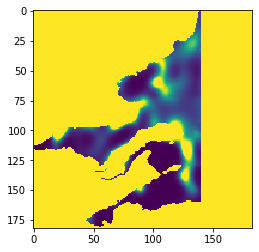

In [21]:
plt.imshow(kQ[0])

In [10]:
new_folder = "../pred_clim/I3D_2400_CALIB/data_200modelsV2"

if "data_200modelsV2" not in os.listdir("../pred_clim/I3D_2400_CALIB/"):
    os.makedirs("../pred_clim/I3D_2400_CALIB/data_200modelsV2")
np.save(os.path.join(new_folder,"kQ"),kQ)
np.save(os.path.join(new_folder,"kPc"),kPc)
np.save(os.path.join(new_folder,"kep"),kep)
np.save(os.path.join(new_folder,"kpms"),kpms)
np.save(os.path.join(new_folder,"kqm"),kqm)
np.save(os.path.join(new_folder,"irr"),irr)
np.save(os.path.join(new_folder,"cond_riv"),cond_riv)

In [23]:
#rivers (agly,bol,cant,rea,tech,tet)
#df_new_pars.iloc[i_model,119:125]

In [42]:
post_obj = "3D_pp2400_REG/master_glm_run/3D_test.
df = pd.read_csv(post_obj)

In [43]:
df

,real_name,pc_usecol:3_101_59_time:1.0,pc_usecol:3_102_22_time:1.0,pc_usecol:3_102_28_time:1.0,pc_usecol:3_103_32_time:1.0,pc_usecol:3_104_74_time:1.0,pc_usecol:3_108_42_time:1.0,pc_usecol:3_109_12_time:1.0,pc_usecol:3_111_42_time:1.0,pc_usecol:3_112_61_time:1.0,...,quat_usecol:1_88_110_time:1.0,quat_usecol:1_92_93_time:1.0,quat_usecol:1_93_114_time:1.0,quat_usecol:1_94_103_time:1.0,quat_usecol:1_94_115_time:1.0,quat_usecol:1_94_95_time:1.0,quat_usecol:1_95_75_time:1.0,quat_usecol:1_95_81_time:1.0,quat_usecol:1_95_95_time:1.0,quat_usecol:1_99_44_time:1.0
0,0,59.8866,117.335,107.885,102.467,47.1813,94.7926,145.587,98.3414,70.9578,...,6.77784,18.5428,5.41348,12.6364,4.70910,17.0380,41.9080,31.6794,17.2557,81.5336
1,1,60.7091,117.658,107.872,102.433,48.7600,95.8937,143.643,98.8017,70.6750,...,6.28260,18.3382,5.48078,12.4807,4.88196,16.9336,39.8440,31.6847,17.1113,82.9012
2,2,60.5744,117.515,104.776,101.167,49.6392,96.1926,145.966,99.8433,69.1760,...,6.51876,18.0605,5.36921,12.3389,4.68283,16.9341,43.1126,31.3532,17.1676,81.3018
3,3,61.1122,119.100,108.619,101.974,50.1671,95.1720,142.406,98.3416,70.3675,...,5.93954,18.4746,5.32987,12.4405,4.68531,16.9880,41.2127,33.0734,17.1843,80.3447
4,4,61.3179,118.770,105.922,102.379,49.8456,96.8601,145.123,99.8453,72.9954,...,5.76210,18.4516,5.12390,12.3659,4.39183,17.0725,42.0854,31.2006,17.2976,81.1565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,61.4728,118.640,109.127,102.772,50.1657,94.2861,142.466,97.5577,71.5368,...,6.43928,18.7468,5.29813,12.3033,4.61937,17.0728,40.1205,32.2543,17.2775,81.4813
196,196,61.4363,117.856,107.736,102.231,49.2758,95.2891,144.344,98.4329,71.7682,...,5.94688,18.6855,5.01499,12.6253,4.18739,17.1441,40.2538,31.7952,17.3576,82.3083
197,197,62.3366,117.144,107.146,102.112,47.2055,94.3305,144.366,97.5522,71.9490,...,6.02626,18.3921,5.31787,12.6376,4.70360,17.0722,41.9689,30.1850,17.2837,81.7336
198,198,61.5076,118.450,107.757,102.359,49.7013,94.2244,144.601,97.8402,71.6027,...,6.27051,18.0710,5.62429,12.6557,5.03782,16.9579,40.9263,30.5303,17.1775,82.5913
